# Business Problem Understanding

**The business problem is to accurately predict the future adjusted closing price of Gold ETF, enabling investors to make informed decisions on when to buy or sell the commodity.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Data Understanding
**collect and load the data**

In [2]:
df = pd.read_csv(r"C:\Users\L.RAMYA\OneDrive\Desktop\train for gold.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,15-12-2011,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,16-12-2011,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,19-12-2011,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,20-12-2011,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,21-12-2011,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,21-08-2017,122.540001,122.980003,122.500000,122.760002,122.760002,5549700,242.639999,243.199997,241.830002,...,23.020000,23.309999,23.001732,45542000,9.870000,9.910000,9.640000,9.710000,9.710000,30279000
1380,22-08-2017,122.559998,122.559998,121.849998,122.209999,122.209999,6493900,243.570007,245.619995,243.550003,...,23.080000,23.090000,22.784641,38877800,9.760000,9.840000,9.720000,9.770000,9.770000,14248600
1381,23-08-2017,122.580002,122.690002,122.309998,122.669998,122.669998,5038400,244.330002,245.050003,244.160004,...,23.080000,23.260000,22.952394,28781900,9.760000,9.900000,9.730000,9.880000,9.880000,16572400
1382,24-08-2017,122.389999,122.639999,122.129997,122.290001,122.290001,4193400,245.000000,245.179993,243.750000,...,23.180000,23.350000,23.041204,37205600,9.790000,9.800000,9.610000,9.710000,9.710000,18166700


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1384 non-null   object 
 1   Open           1384 non-null   float64
 2   High           1384 non-null   float64
 3   Low            1384 non-null   float64
 4   Close          1384 non-null   float64
 5   Adj Close      1384 non-null   float64
 6   Volume         1384 non-null   int64  
 7   SP_open        1384 non-null   float64
 8   SP_high        1384 non-null   float64
 9   SP_low         1384 non-null   float64
 10  SP_close       1384 non-null   float64
 11  SP_Ajclose     1384 non-null   float64
 12  SP_volume      1384 non-null   int64  
 13  DJ_open        1384 non-null   float64
 14  DJ_high        1384 non-null   float64
 15  DJ_low         1384 non-null   float64
 16  DJ_close       1384 non-null   float64
 17  DJ_Ajclose     1384 non-null   float64
 18  DJ_volum

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [5]:
training_set = df.iloc[:,5].values
training_set

array([152.330002, 155.229996, 154.869995, ..., 122.669998, 122.290001,
       122.739998])

# FEATURE SCALING

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set.reshape(-1,1))
training_set_scaled.shape

(1384, 1)

**creating a data structure with 60 timesteps and 1 output**

In [10]:
import numpy as np

X_train = []
y_train = []

# Loop to create sequences of 60 days and corresponding target price
for i in range(60, 1384):  # Assuming training data ends at index 1384
    X_train.append(training_set_scaled[i-60:i, 0])  # Last 60 days as input
    y_train.append(training_set_scaled[i, 0])  # Current day's value as output

# Convert to numpy arrays for LSTM input
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape X_train to be in the shape (samples, time_steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (1324, 60, 1)
Shape of y_train: (1324,)


**reshaping**

In [11]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

**building and training the rnn**
**importing the keras libraries and packages**

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

**initialising the rnn**


In [13]:
regressor = Sequential()

**adding the first LSTM layer and some dropout regularisation**

In [14]:
regressor.add(LSTM(units=50,return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

**adding the second LSTM layer and some dropout regularisation**

In [15]:
regressor.add(LSTM(units=50,return_sequences= True))
regressor.add(Dropout(0.2))

**adding the third LSTM layer and some dropout regularisation**

In [16]:
regressor.add(LSTM(units=50,return_sequences= True))
regressor.add(Dropout(0.2))

**adding the fourth LSTM layer and some dropout regularisation**

In [17]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

**adding the output layer**

In [18]:
regressor.add(Dense(units=1))

**compiling the rnn**

In [20]:
regressor.compile(optimizer = 'adam',loss= "mean_squared_error")

**fitting the RNN to the Training set**

In [21]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 28s 157ms/step - loss: 0.0638
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - loss: 0.0054
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - loss: 0.0050
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - loss: 0.0043
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - loss: 0.0054
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - loss: 0.0047
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - loss: 0.0042
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - loss: 0.0042
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - loss: 0.0041
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - loss: 0.0052
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - loss: 0.0038
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - loss: 0.0034
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - loss: 0.0039
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - loss: 0.0031
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s

In [24]:
pred = regressor.predict(X_train)

42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step


**evaluating the rnn**

In [25]:
import math
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train,pred))
rmse


0.022880222950784214

**test data**

In [26]:
df1 = pd.read_csv(r"C:\Users\L.RAMYA\OneDrive\Desktop\test for gold.csv")
df1
real_stock_price = df1.iloc[:,5].values

In [27]:
# Concatenating training and test data (Open prices)
dataset_total = pd.concat((df['Open'], df1['Open']), axis=0)

# Extracting the last part for test input (from the combined dataset)
inputs = dataset_total[len(dataset_total)-len(df1)-60:].values  # Last 60 days + test set
inputs = inputs.reshape(-1, 1)  # Reshape to (n_samples, 1) for scaling
inputs = sc.transform(inputs)  # Scale using the same scaler used for training

# Prepare the X_test by creating sequences for LSTM
X_test = []
for i in range(60, len(inputs)):  # Start from 60th index to the end
    X_test.append(inputs[i-60:i, 0])  # Create sequences of 60 previous days
X_test = np.array(X_test)  # Convert to numpy array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape for LSTM input

# Predict stock prices for the test data
predicted_stock_price = regressor.predict(X_test)

# Inverse transform the predicted values to get them back to the original scale
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [28]:
predicted_stock_price

array([[122.56748 ],
       [122.952705],
       [124.40122 ],
       [124.79409 ],
       [124.71864 ],
       [125.22603 ],
       [125.9814  ],
       [126.73854 ],
       [127.22012 ],
       [127.67861 ],
       [127.23686 ],
       [126.38828 ],
       [126.01736 ],
       [125.650856],
       [125.59665 ],
       [125.083176],
       [124.55073 ],
       [124.37843 ],
       [123.43057 ],
       [122.87738 ],
       [122.65841 ],
       [123.01767 ],
       [122.69286 ],
       [122.274574],
       [122.18561 ],
       [121.53706 ],
       [121.22272 ],
       [121.19359 ],
       [120.859344],
       [121.21842 ],
       [122.13053 ],
       [122.73615 ],
       [123.04511 ],
       [123.49126 ],
       [123.84282 ],
       [123.14845 ],
       [122.270775],
       [122.0207  ],
       [121.87229 ],
       [121.47751 ],
       [121.31676 ],
       [121.35257 ],
       [121.35617 ],
       [120.97427 ],
       [120.638176],
       [120.70407 ],
       [120.9546  ],
       [121.2

**Visualising the Result**

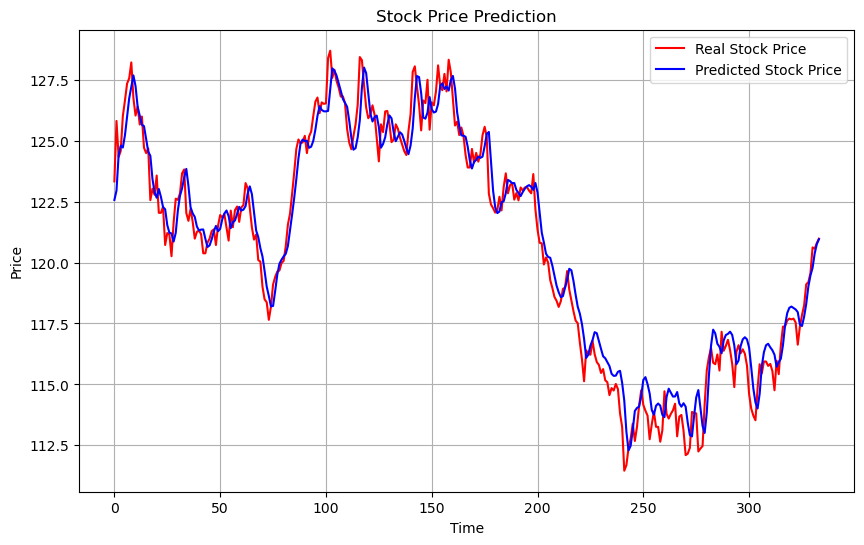

In [29]:
import matplotlib.pyplot as plt

# Match dimensions
real_stock_price = df1['Open'].values[-len(predicted_stock_price):]
predicted_stock_price = predicted_stock_price.flatten()

plt.figure(figsize=(10,6))
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
